# Sales Analysis

1) Identify the states that are generating the highest revenues. 
2) Develop sales programs for states with lower revenues. The head of sales 
and marketing has requested your assistance with this task. 

## Task to perform
1. Data wrangling 
2. Data analysis 
3. Data visualization 
4. Report generation

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('AusApparalSales4thQrt2020.csv',parse_dates=['Date'],index_col='Date')

In [7]:
df.shape

(7560, 5)

In [8]:
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2020-10-01 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    7560 non-null   object
 1   State   7560 non-null   object
 2   Group   7560 non-null   object
 3   Unit    7560 non-null   int64 
 4   Sales   7560 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.4+ KB


In [10]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## Data wrangling 
 - a. Ensure that the data is clean and free from any missing or incorrect entries. 
 Inspect the data manually to identify missing or incorrect information 
using the functions isna() and notna(). 
 - b. Based on your knowledge of data analytics, include your recommendations 
for treating missing and incorrect data (dropping the null values or filling 
them). 
 - c. Choose a suitable data wrangling technique—either data standardization or 
normalization. Execute the preferred normalization method and present the 
resulting data. (Normalization is the preferred approach for this problem.) 
 - d. Share your insights regarding the application of the GroupBy() function for 
either data chunking or merging, and offer a recommendation based on your 
analysis. 


#### a & b: Checking for any missing data in the column.

In [13]:
df.isnull().sum()

Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

 - It is found that there are no null values. 

#### c : Presenting the values using Normalization method

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mms=MinMaxScaler()

In [18]:
#Get a list of all numeric columns in the dataframe

In [19]:
a=df._get_numeric_data().columns.tolist()
a

['Unit', 'Sales']

In [20]:
#df[['Sales_scaled','Unit_scaled']]=mms.fit_transform(df[['Sales','Unit']])
#df.head()

In [21]:
# Normalize 'Unit' and 'Sales' columns using MinMaxScaler

In [22]:
norm=mms.fit_transform(df[['Unit', 'Sales']])
norm

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

 - The columns with numeric values are scaled using normalization method.
 - This transforms the values to a scale between 0 and 1

#### d: GroupBy()

In [25]:
#Strip is used to remove any space in the 'State' & 'Group' column

In [26]:
df['State']=df['State'].str.strip()
df['Group']=df['Group'].str.strip()

In [27]:
#Grouping the data based on state wise for easy classification.

In [28]:
g=df.groupby('State')
g

In [29]:
#Loop through each (State, city) pair in the groupby object g1

In [30]:
for State, city in g:
    print(State)
    print(city)
    

NSW
                  Time State    Group  Unit   Sales
Date                                               
2020-10-01     Morning   NSW     Kids    39   97500
2020-10-01     Morning   NSW      Men    17   42500
2020-10-01     Morning   NSW    Women    34   85000
2020-10-01     Morning   NSW  Seniors    23   57500
2020-10-01   Afternoon   NSW     Kids    40  100000
...                ...   ...      ...   ...     ...
2020-12-30   Afternoon   NSW  Seniors    19   47500
2020-12-30     Evening   NSW     Kids    37   92500
2020-12-30     Evening   NSW      Men    41  102500
2020-12-30     Evening   NSW    Women    37   92500
2020-12-30     Evening   NSW  Seniors    23   57500

[1080 rows x 5 columns]
NT
                  Time State    Group  Unit  Sales
Date                                              
2020-10-01     Morning    NT     Kids    13  32500
2020-10-01     Morning    NT      Men     5  12500
2020-10-01     Morning    NT    Women     4  10000
2020-10-01     Morning    NT  Seniors

In [31]:
#Extract data for each Australian state from the grouped DataFrame 'g'

In [32]:
nsw_state=g.get_group('NSW')
nt_state=g.get_group('NT')
qld_state=g.get_group('QLD')
sa_state=g.get_group('SA')
tas_state=g.get_group('TAS')
vic_state=g.get_group('VIC')
wa_state=g.get_group('WA')

In [33]:
#Group data by 'Group' column for each Australian state

In [34]:
nsw_group=nsw_state.groupby('Group')
nt_group=nt_state.groupby('Group')
qld_group=qld_state.groupby('Group')
sa_group=sa_state.groupby('Group')
tas_group=tas_state.groupby('Group')
vic_group=vic_state.groupby('Group')
wa_group=wa_state.groupby('Group')

In [35]:
nsw_group.get_group('Kids')

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,NSW,Kids,39,97500
2020-10-01,Afternoon,NSW,Kids,40,100000
2020-10-01,Evening,NSW,Kids,22,55000
2020-10-02,Morning,NSW,Kids,32,80000
2020-10-02,Afternoon,NSW,Kids,33,82500
...,...,...,...,...,...
2020-12-29,Afternoon,NSW,Kids,34,85000
2020-12-29,Evening,NSW,Kids,40,100000
2020-12-30,Morning,NSW,Kids,27,67500


 - At first the 'State' column was grouped as it was a major classification. Then the 'Group' column was grouped, so that it will be easy to identify in which state what category people bougt the maximum, minimun, avg, mean etc.

## Data analysis 
 - a. Perform descriptive statistical analysis on the data in the Sales and Unit 
columns. Utilize techniques such as mean, median, mode, and standard 
deviation for this analysis. 
 - b. Identify the group with the highest sales and the group with the lowest sales 
based on the data provided. 
 - c. Identify the group with the highest and lowest sales based on the data 
provided. 
 - d. Generate weekly, monthly, and quarterly reports to document and present the 
results of the analysis conducted. 
(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the 
analysis.)

#### a. To perform mean, median, mode adnd standard deviation on "Sales" & "Unit" column

In [39]:
import statistics as stat

#### SALES

##### mean,median, mode & std of 'Sales' of all states

SALES MEAN: 45013.5582010582
SALES MEDIAN: 35000.0
SALES MODE: 22500
SALES STD: 32251.373704971687


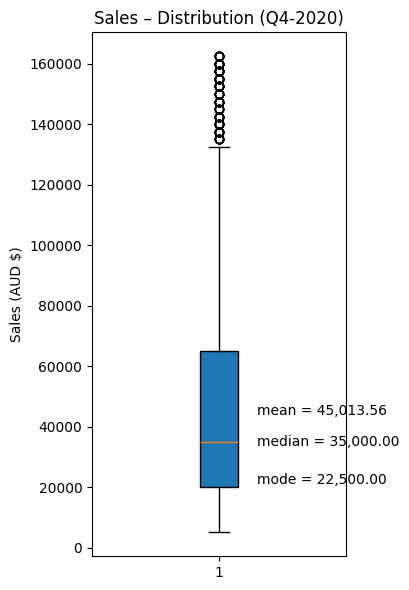

In [201]:
print('SALES MEAN:',np.mean(df.Sales))
print('SALES MEDIAN:',np.median(df.Sales))
print('SALES MODE:',stat.mode(df.Sales))
print('SALES STD:',np.std(df.Sales))

plt.figure(figsize=(4,6))
plt.boxplot(df.Sales, vert=True, patch_artist=True)
plt.title("Sales – Distribution (Q4-2020)")
plt.ylabel("Sales (AUD $)")

plt.text(1.15, np.mean(df.Sales),   f"mean = {np.mean(df.Sales):,.2f}",   va="center")
plt.text(1.15, np.median(df.Sales), f"median = {np.median(df.Sales):,.2f}",va="center")
plt.text(1.15, stat.mode(df.Sales),   f"mode = {stat.mode(df.Sales):,.2f}",   va="center")
plt.tight_layout()

#### Sales for individual states

##### mean,median, mode & std of 'Sales' for NSW State

In [45]:
print('NSW STATE\n')
print('SALES MEAN:',np.mean(nsw_state.Sales))
print('SALES MEDIAN:',np.median(nsw_state.Sales))
print('SALES MODE:',stat.mode(nsw_state.Sales))
print('SALES STD:',np.std(nsw_state.Sales))

NSW STATE

SALES MEAN: 69416.66666666667
SALES MEDIAN: 70000.0
SALES MODE: 75000
SALES STD: 20617.10005832085


##### mean,median, mode & std of 'Sales' for NT State

In [47]:
print('NT STATE\n')
print('SALES MEAN:',np.mean(nt_state.Sales))
print('SALES MEDIAN:',np.median(nt_state.Sales))
print('SALES MODE:',stat.mode(nt_state.Sales))
print('SALES STD:',np.std(nt_state.Sales))

NT STATE

SALES MEAN: 20907.40740740741
SALES MEDIAN: 20000.0
SALES MODE: 22500
SALES STD: 8957.757900936855


##### mean,median, mode & std of 'Sales' for QLD State

In [49]:
print('QLD STATE\n')
print('SALES MEAN:',np.mean(qld_state.Sales))
print('SALES MEDIAN:',np.median(qld_state.Sales))
print('SALES MODE:',stat.mode(qld_state.Sales))
print('SALES STD:',np.std(qld_state.Sales))

QLD STATE

SALES MEAN: 30942.12962962963
SALES MEDIAN: 30000.0
SALES MODE: 22500
SALES STD: 13338.458497679087


##### mean,median, mode & std of 'Sales' for SA State

In [51]:
print('SA STATE\n')
print('SALES MEAN:',np.mean(sa_state.Sales))
print('SALES MEDIAN:',np.median(sa_state.Sales))
print('SALES MODE:',stat.mode(sa_state.Sales))
print('SALES STD:',np.std(sa_state.Sales))

SA STATE

SALES MEAN: 54497.68518518518
SALES MEDIAN: 52500.0
SALES MODE: 62500
SALES STD: 17452.879530349506


##### mean,median, mode & std of 'Sales' for TAS State

In [53]:
print('TAS STATE\n')
print('SALES MEAN:',np.mean(tas_state.Sales))
print('SALES MEDIAN:',np.median(tas_state.Sales))
print('SALES MODE:',stat.mode(tas_state.Sales))
print('SALES STD:',np.std(tas_state.Sales))

TAS STATE

SALES MEAN: 21074.074074074073
SALES MEDIAN: 20000.0
SALES MODE: 25000
SALES STD: 9020.505142814904


##### mean,median, mode & std of 'Sales' for VIC State

In [55]:
print('VIC STATE\n')
print('SALES MEAN:',np.mean(vic_state.Sales))
print('SALES MEDIAN:',np.median(vic_state.Sales))
print('SALES MODE:',stat.mode(vic_state.Sales))
print('SALES STD:',np.std(vic_state.Sales))

VIC STATE

SALES MEAN: 97745.37037037036
SALES MEDIAN: 95000.0
SALES MODE: 102500
SALES STD: 26609.269424530798


##### mean,median, mode & std of 'Sales' for WA State

In [57]:
print('WA STATE\n')
print('SALES MEAN:',np.mean(wa_state.Sales))
print('SALES MEDIAN:',np.median(wa_state.Sales))
print('SALES MODE:',stat.mode(wa_state.Sales))
print('SALES STD:',np.std(wa_state.Sales))

WA STATE

SALES MEAN: 20511.574074074073
SALES MEDIAN: 20000.0
SALES MODE: 15000
SALES STD: 9227.63087668577


 - At first the state's overall Sales mean, median, mode, std has been calculated. Then individual state wise has been calculaetd.

#### UNIT

##### mean,median, mode & std of 'Unit' of all states

UNIT MEAN: 18.00542328042328
UNIT MEDIAN: 14.0
UNIT MODE: 9
UNIT STD: 12.900549481988609


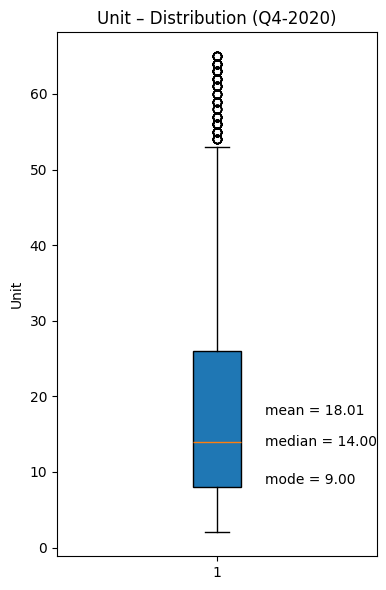

In [203]:
print('UNIT MEAN:',np.mean(df.Unit))
print('UNIT MEDIAN:',np.median(df.Unit))
print('UNIT MODE:',stat.mode(df.Unit))
print('UNIT STD:',np.std(df.Unit))

plt.figure(figsize=(4,6))
plt.boxplot(df.Unit, vert=True, patch_artist=True)
plt.title("Unit – Distribution (Q4-2020)")
plt.ylabel("Unit")

plt.text(1.15, np.mean(df.Unit),   f"mean = {np.mean(df.Unit):,.2f}",   va="center")
plt.text(1.15, np.median(df.Unit), f"median = {np.median(df.Unit):,.2f}",va="center")
plt.text(1.15, stat.mode(df.Unit),   f"mode = {stat.mode(df.Unit):,.2f}",   va="center")
plt.tight_layout()

#### Unit for individual states

##### mean,median, mode & std of 'Unit' for NSW State

In [64]:
print('NSW STATE\n')
print('UNIT MEAN:',np.mean(nsw_state.Unit))
print('UNIT MEDIAN:',np.median(nsw_state.Unit))
print('UNIT MODE:',stat.mode(nsw_state.Unit))
print('UNIT STD:',np.std(nsw_state.Unit))

NSW STATE

UNIT MEAN: 27.766666666666666
UNIT MEDIAN: 28.0
UNIT MODE: 30
UNIT STD: 8.246840023328348


##### mean,median, mode & std of 'Unit' for NT State

In [66]:
print('NT STATE\n')
print('UNIT MEAN:',np.mean(nt_state.Unit))
print('UNIT MEDIAN:',np.median(nt_state.Unit))
print('UNIT MODE:',stat.mode(nt_state.Unit))
print('UNIT STD:',np.std(nt_state.Unit))

NT STATE

UNIT MEAN: 8.362962962962962
UNIT MEDIAN: 8.0
UNIT MODE: 9
UNIT STD: 3.5831031603747494


##### mean,median, mode & std of 'Unit' for QLD State

In [68]:
print('QLD STATE\n')
print('UNIT MEAN:',np.mean(qld_state.Unit))
print('UNIT MEDIAN:',np.median(qld_state.Unit))
print('UNIT MODE:',stat.mode(qld_state.Unit))
print('UNIT STD:',np.std(qld_state.Unit))

QLD STATE

UNIT MEAN: 12.376851851851852
UNIT MEDIAN: 12.0
UNIT MODE: 9
UNIT STD: 5.335383399071675


##### mean,median, mode & std of 'Unit' for SA State

In [70]:
print('SA STATE\n')
print('UNIT MEAN:',np.mean(sa_state.Unit))
print('UNIT MEDIAN:',np.median(sa_state.Unit))
print('UNIT MODE:',stat.mode(sa_state.Unit))
print('UNIT STD:',np.std(sa_state.Unit))

SA STATE

UNIT MEAN: 21.799074074074074
UNIT MEDIAN: 21.0
UNIT MODE: 25
UNIT STD: 6.981151812139793


##### mean,median, mode & std of 'Unit' for TAS State

In [72]:
print('TAS STATE\n')
print('UNIT MEAN:',np.mean(tas_state.Unit))
print('UNIT MEDIAN:',np.median(tas_state.Unit))
print('UNIT MODE:',stat.mode(tas_state.Unit))
print('UNIT STD:',np.std(tas_state.Unit))

TAS STATE

UNIT MEAN: 8.42962962962963
UNIT MEDIAN: 8.0
UNIT MODE: 10
UNIT STD: 3.6082020571259608


##### mean,median, mode & std of 'Unit' for VIC State

In [74]:
print('VIC STATE\n')
print('UNIT MEAN:',np.mean(vic_state.Unit))
print('UNIT MEDIAN:',np.median(vic_state.Unit))
print('UNIT MODE:',stat.mode(vic_state.Unit))
print('UNIT STD:',np.std(vic_state.Unit))

VIC STATE

UNIT MEAN: 39.09814814814815
UNIT MEDIAN: 38.0
UNIT MODE: 41
UNIT STD: 10.64370776981232


##### mean,median, mode & std of 'Unit' for WA State

In [76]:
print('WA STATE\n')
print('UNIT MEAN:',np.mean(wa_state.Unit))
print('UNIT MEDIAN:',np.median(wa_state.Unit))
print('UNIT MODE:',stat.mode(wa_state.Unit))
print('UNIT STD:',np.std(wa_state.Unit))

WA STATE

UNIT MEAN: 8.204629629629629
UNIT MEDIAN: 8.0
UNIT MODE: 6
UNIT STD: 3.6910523506743136


 - At first the state's overall unit's mean, median, mode, std has been calculated. Then individual state wise has been calculaetd.

#### b & c. Identify the group with the highest and lowest sales based on the data provided.

In [79]:
group_min_max=df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
group_min=group_min_max.idxmin()
group_max=group_min_max.idxmax()
print('GROUP WITH HIGHEST SALES:',group_max)
print('GROUP WITH LOWEST SALES:',group_min)

GROUP WITH HIGHEST SALES: Men
GROUP WITH LOWEST SALES: Seniors


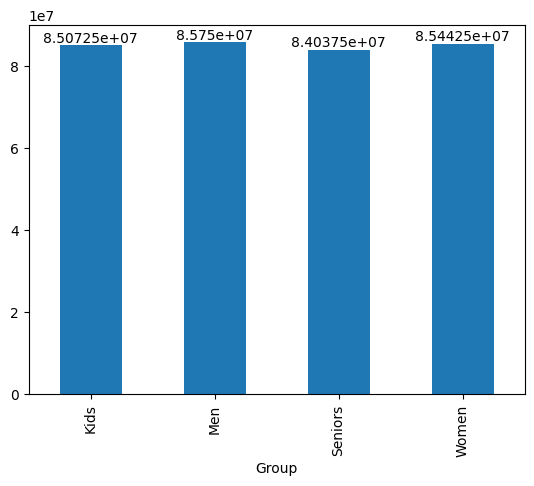

In [80]:
ax=df.groupby('Group')['Sales'].sum().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - When all states are accounted for, it is found that amongst the 4 groups, Men made the most purchases, while Seniors bought the least.
 - From this, it's found that there's room for improvement in the Seniors category to improve sales.

#### d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted. 

##### WEEKLY SALES

In [84]:
df.Sales.resample('W').sum()

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

##### WEEKLY SALES OF INDIVIDUAL STATES

In [86]:
print('NSW STATE\n',nsw_state.Sales.resample('W').sum())
print('\nNT STATE\n',nt_state.Sales.resample('W').sum())
print('\nQLD STATE\n',qld_state.Sales.resample('W').sum())
print('\nSA STATE\n',sa_state.Sales.resample('W').sum())
print('\nTAS STATE\n',tas_state.Sales.resample('W').sum())
print('\nVIC STATE\n',vic_state.Sales.resample('W').sum())
print('\nWA STATE\n',wa_state.Sales.resample('W').sum())

NSW STATE
 Date
2020-10-04    3382500
2020-10-11    5892500
2020-10-18    5717500
2020-10-25    5922500
2020-11-01    4822500
2020-11-08    4915000
2020-11-15    4957500
2020-11-22    4987500
2020-11-29    5147500
2020-12-06    6277500
2020-12-13    6807500
2020-12-20    6647500
2020-12-27    6522500
2021-01-03    2970000
Freq: W-SUN, Name: Sales, dtype: int64

NT STATE
 Date
2020-10-04    1052500
2020-10-11    1937500
2020-10-18    1935000
2020-10-25    1907500
2020-11-01    1520000
2020-11-08    1150000
2020-11-15    1247500
2020-11-22    1282500
2020-11-29    1267500
2020-12-06    1937500
2020-12-13    2145000
2020-12-20    2232500
2020-12-27    2032500
2021-01-03     932500
Freq: W-SUN, Name: Sales, dtype: int64

QLD STATE
 Date
2020-10-04    1627500
2020-10-11    2545000
2020-10-18    2637500
2020-10-25    2592500
2020-11-01    1997500
2020-11-08    1825000
2020-11-15    1905000
2020-11-22    1875000
2020-11-29    1957500
2020-12-06    2997500
2020-12-13    3310000
2020-12-20    3

##### MONTHLY SALES

In [88]:
df.Sales.resample('ME').sum()

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

##### MONTHLY SALES OF INDIVIDUAL STATES

In [90]:
print('NSW STATE\n',nsw_state.Sales.resample('ME').sum())
print('\nNT STATE\n',nt_state.Sales.resample('ME').sum())
print('\nQLD STATE\n',qld_state.Sales.resample('ME').sum())
print('\nSA STATE\n',sa_state.Sales.resample('ME').sum())
print('\nTAS STATE\n',tas_state.Sales.resample('ME').sum())
print('\nVIC STATE\n',vic_state.Sales.resample('ME').sum())
print('\nWA STATE\n',wa_state.Sales.resample('ME').sum())

NSW STATE
 Date
2020-10-31    25007500
2020-11-30    21490000
2020-12-31    28472500
Freq: ME, Name: Sales, dtype: int64

NT STATE
 Date
2020-10-31    8222500
2020-11-30    5257500
2020-12-31    9100000
Freq: ME, Name: Sales, dtype: int64

QLD STATE
 Date
2020-10-31    11120000
2020-11-30     8110000
2020-12-31    14187500
Freq: ME, Name: Sales, dtype: int64

SA STATE
 Date
2020-10-31    20610000
2020-11-30    15532500
2020-12-31    22715000
Freq: ME, Name: Sales, dtype: int64

TAS STATE
 Date
2020-10-31    8015000
2020-11-30    5545000
2020-12-31    9200000
Freq: ME, Name: Sales, dtype: int64

VIC STATE
 Date
2020-10-31    33442500
2020-11-30    29530000
2020-12-31    42592500
Freq: ME, Name: Sales, dtype: int64

WA STATE
 Date
2020-10-31    7872500
2020-11-30    5217500
2020-12-31    9062500
Freq: ME, Name: Sales, dtype: int64


From the monthly sales of each state, we can infer that: 
 - NSW state has consistently sold 20+ million AUS Dollars every month.
 - For the NT state, the profit slowed down in the second month of the quarter but bounced back in the next month. On an avg, they have 7+ million in sales.
 - For the QLD state, sales dropped by 3+ million in the second month and made sales of 8+ million, but in the last month of the quarter, it made sales of 14+ million.
 - For the SA state, sales dropped by 5+ million in the second month, but in the next month, they increased their sales and finished with 22+ million. The highest bounce back is in this state with 7+ million.
 - For TAS state the sales dropped by 2.5+ million in the second month, but in the last month, it ended with 9+ million in sales, which is 3.5+ million more than the previous month.
 - For the VIC state, the lowest of this state is not even the highest of the remaining states, which is 29+ million. AVG of the state is 35+ million.
 - For WA state, the sales dropped by 2.5+ million in the second month and gained back by 3.5+ million in the last month.

"VIC" is the best-performing state in terms of sales, with 105+ million, whereas "WA" is the least performing state with 22+ million.

Overall, the sales of every state dipped in the second month of the quarter, but they bounced back in the next month.


##### QUARTERLY SALES

In [93]:
df.Sales.resample('QE').sum()

Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

##### QUARTERLY SALES STATE WISE

In [95]:
print('NSW STATE\n',nsw_state.Sales.resample('QE').sum())
print('\nNT STATE\n',nt_state.Sales.resample('QE').sum())
print('\nQLD STATE\n',qld_state.Sales.resample('QE').sum())
print('\nSA STATE\n',sa_state.Sales.resample('QE').sum())
print('\nTAS STATE\n',tas_state.Sales.resample('QE').sum())
print('\nVIC STATE\n',vic_state.Sales.resample('QE').sum())
print('\nWA STATE\n',wa_state.Sales.resample('QE').sum())

NSW STATE
 Date
2020-12-31    74970000
Freq: QE-DEC, Name: Sales, dtype: int64

NT STATE
 Date
2020-12-31    22580000
Freq: QE-DEC, Name: Sales, dtype: int64

QLD STATE
 Date
2020-12-31    33417500
Freq: QE-DEC, Name: Sales, dtype: int64

SA STATE
 Date
2020-12-31    58857500
Freq: QE-DEC, Name: Sales, dtype: int64

TAS STATE
 Date
2020-12-31    22760000
Freq: QE-DEC, Name: Sales, dtype: int64

VIC STATE
 Date
2020-12-31    105565000
Freq: QE-DEC, Name: Sales, dtype: int64

WA STATE
 Date
2020-12-31    22152500
Freq: QE-DEC, Name: Sales, dtype: int64


## Data visualization 
 - a. Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:
  - o State-wise sales analysis for different demographic groups (kids, women, men, and seniors). 
  - o Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states. 
  - o Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales. 
 - b. Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M). 
The dashboard must contain daily, weekly, monthly, and quarterly charts. (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.) 
 - c. Include your recommendation and indicate why you are choosing the recommended visualization package.

#### State-wise sales analysis for different demographic groups (kids, women, men, and seniors)

Text(0.5, 1.0, 'NSW state sales analysis for different demographic groups')

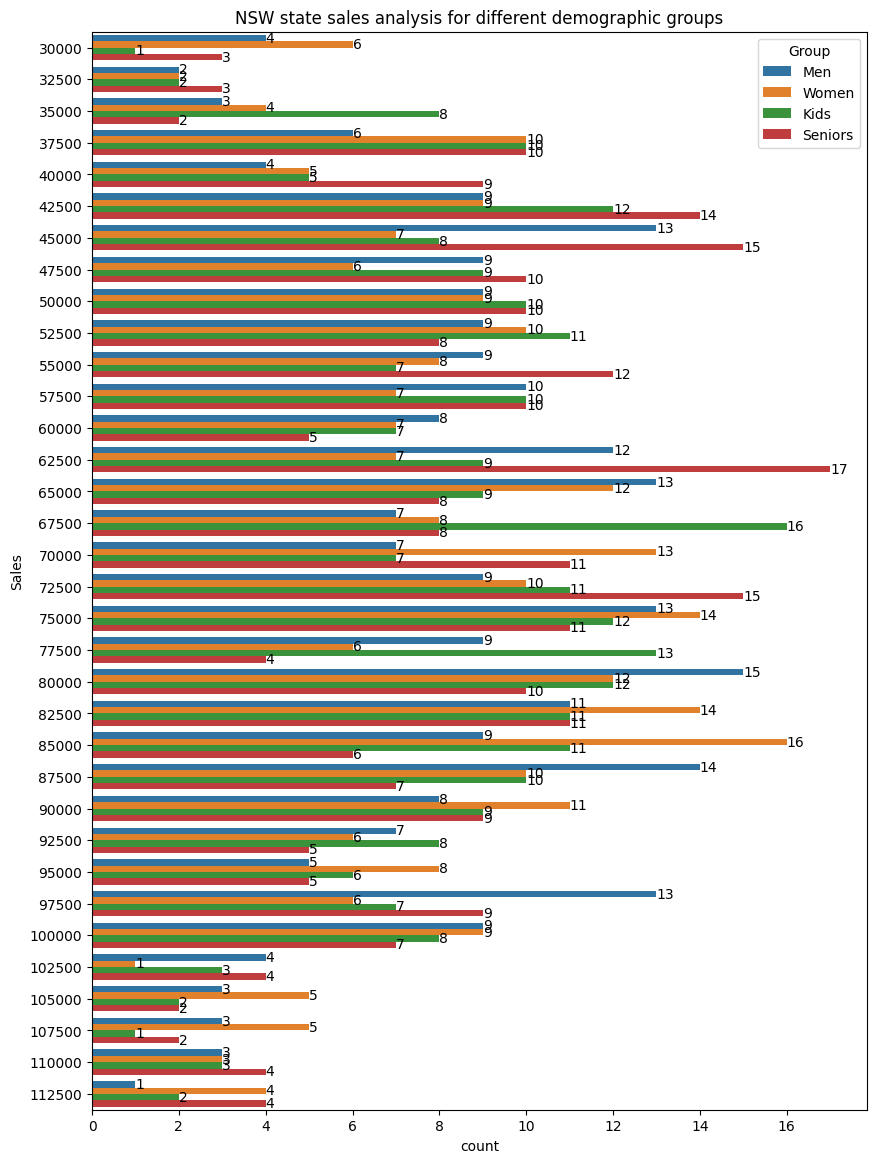

In [98]:
plt.figure(figsize=(10, 14))
ax=sns.countplot(data=nsw_state,y='Sales',hue='Group')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('NSW state sales analysis for different demographic groups')

Text(0.5, 1.0, 'NT state sales analysis for different demographic groups')

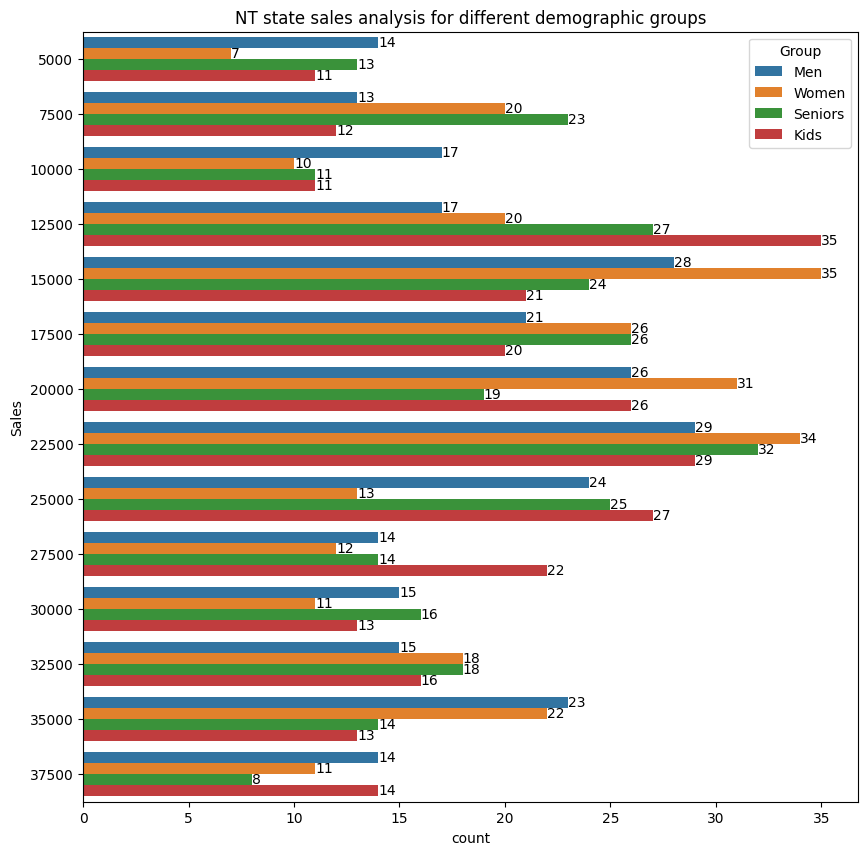

In [99]:
plt.figure(figsize=(10, 10))
ax=sns.countplot(data=nt_state,y='Sales',hue='Group')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('NT state sales analysis for different demographic groups')

Text(0.5, 1.0, 'QLD state sales analysis for different demographic groups')

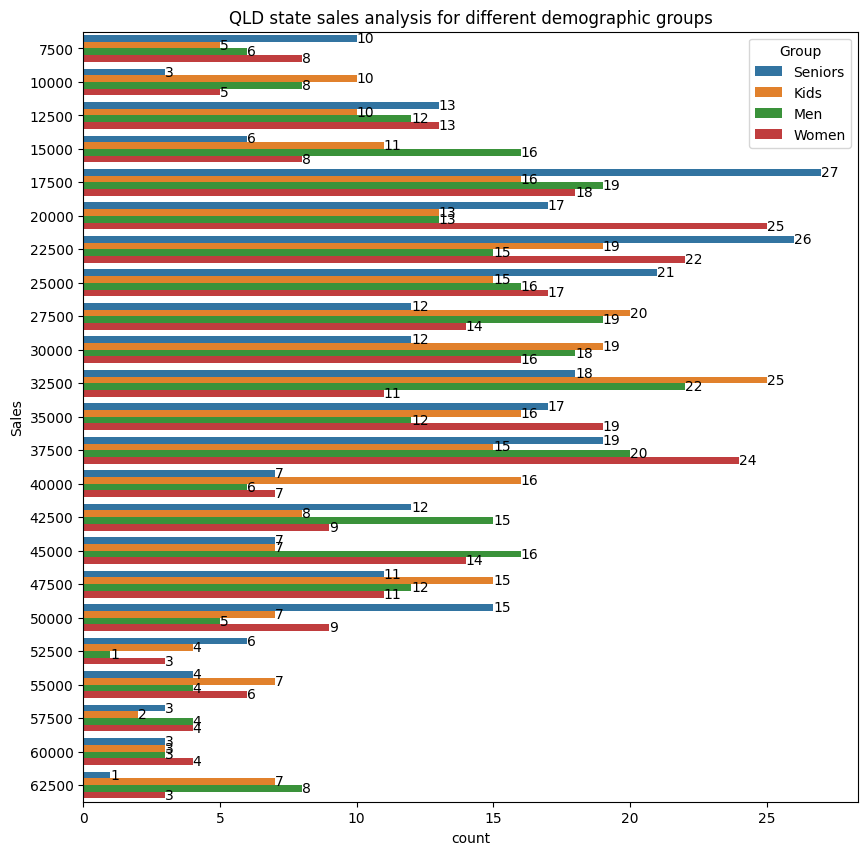

In [100]:
plt.figure(figsize=(10, 10))
ax=sns.countplot(data=qld_state,y='Sales',hue='Group')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('QLD state sales analysis for different demographic groups')

Text(0.5, 1.0, 'SA state sales analysis for different demographic groups')

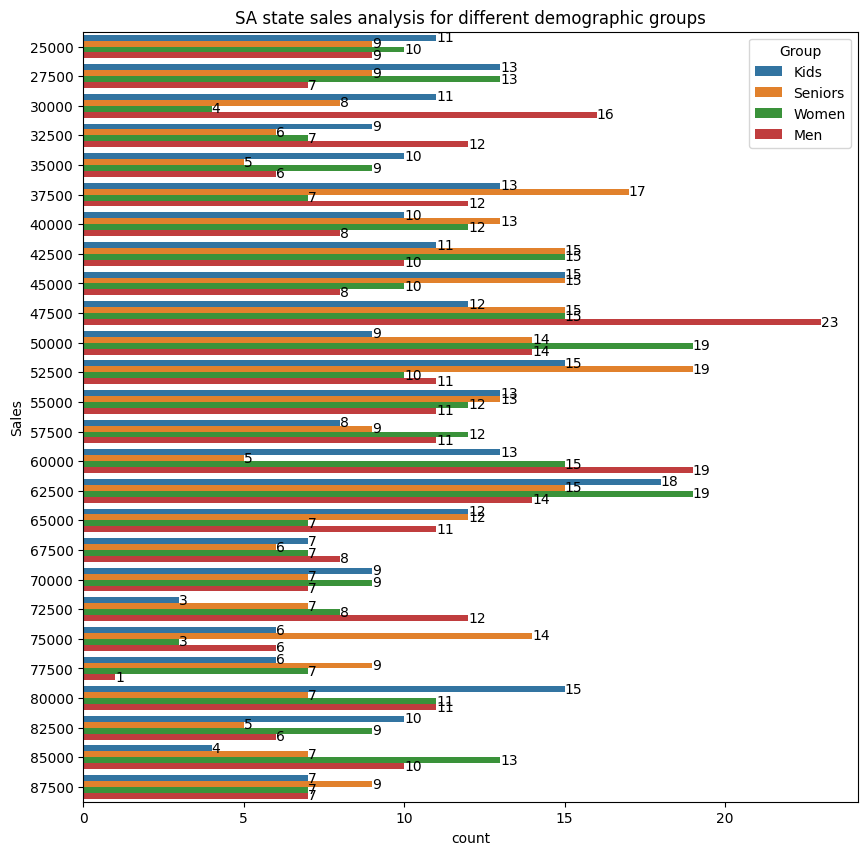

In [101]:
plt.figure(figsize=(10, 10))
ax=sns.countplot(data=sa_state,y='Sales',hue='Group')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('SA state sales analysis for different demographic groups')

Text(0.5, 1.0, 'TAS state sales analysis for different demographic groups')

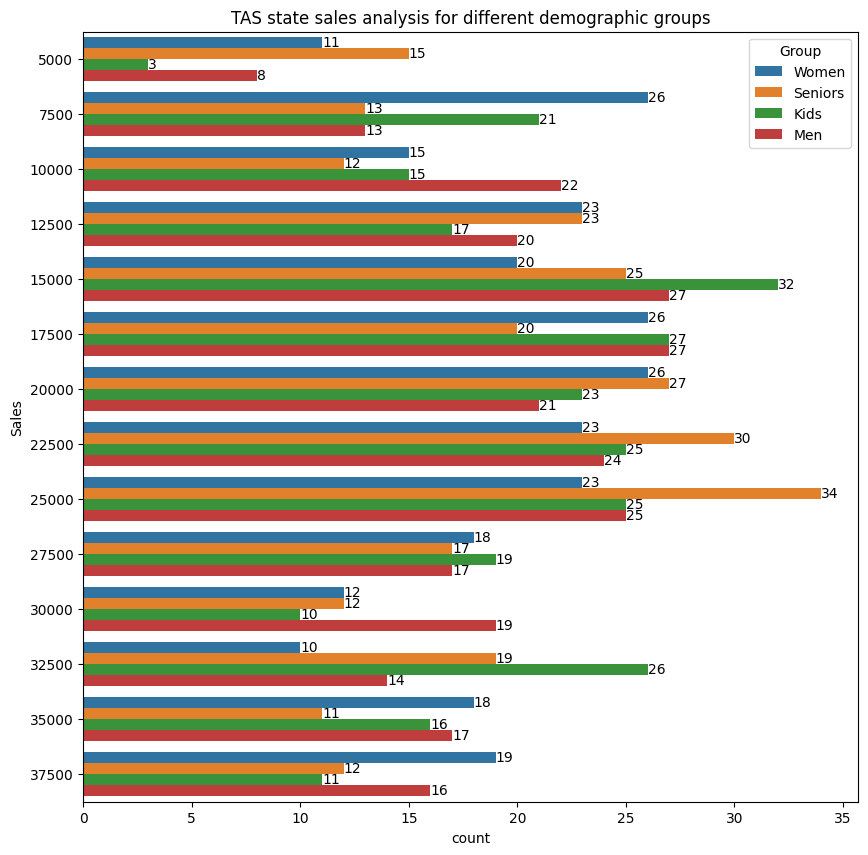

In [102]:
plt.figure(figsize=(10, 10))
ax=sns.countplot(data=tas_state,y='Sales',hue='Group')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('TAS state sales analysis for different demographic groups')

Text(0.5, 1.0, 'VIC state sales analysis for different demographic groups')

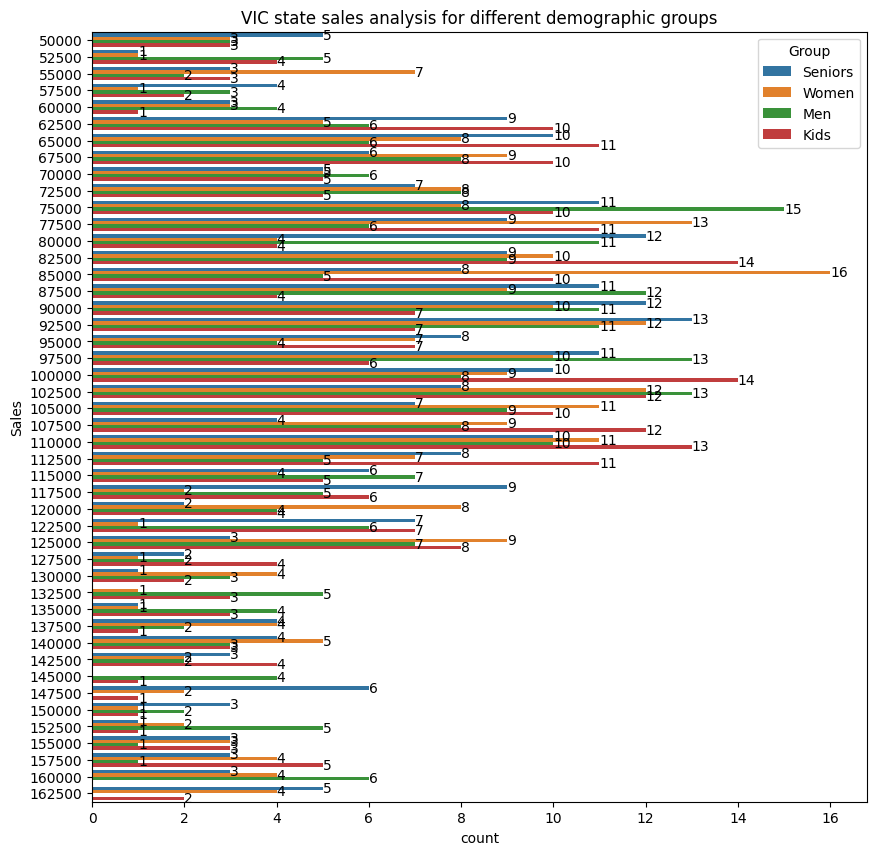

In [103]:
plt.figure(figsize=(10, 10))
ax=sns.countplot(data=vic_state,y='Sales',hue='Group')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('VIC state sales analysis for different demographic groups')

Text(0.5, 1.0, 'WA state sales analysis for different demographic groups')

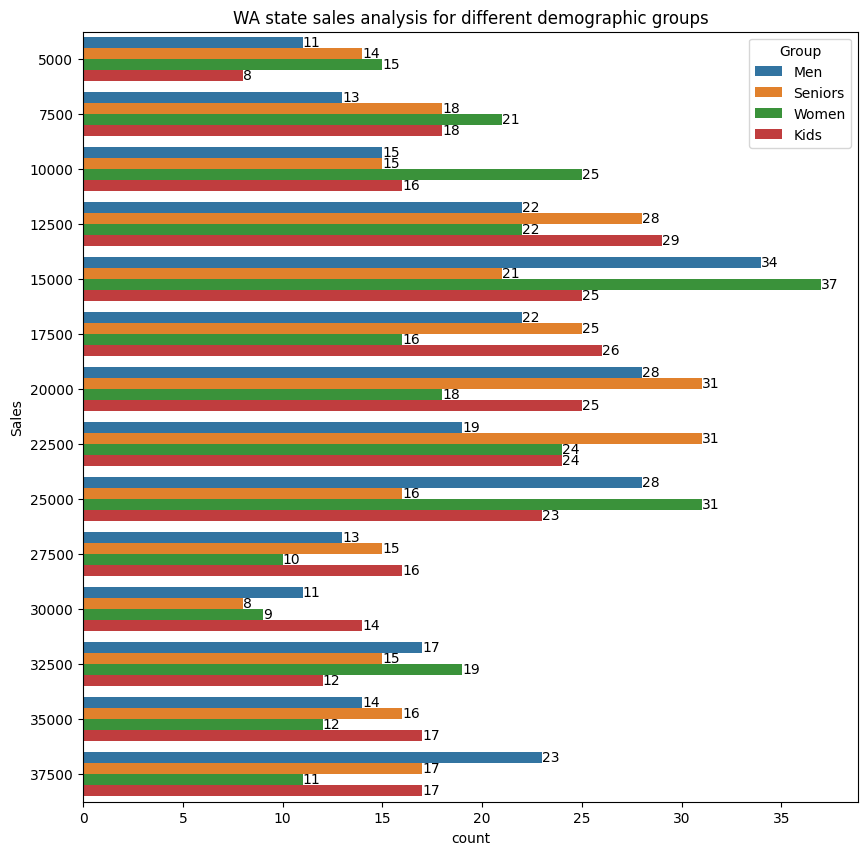

In [104]:
plt.figure(figsize=(10, 10))
ax=sns.countplot(data=wa_state,y='Sales',hue='Group')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('WA state sales analysis for different demographic groups')

 - From the above graphs, we can identify the sales made by different demographic groups (kids, women, men, and seniors) and their count for each state.

#### Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams.

Text(0, 0.5, 'Sales')

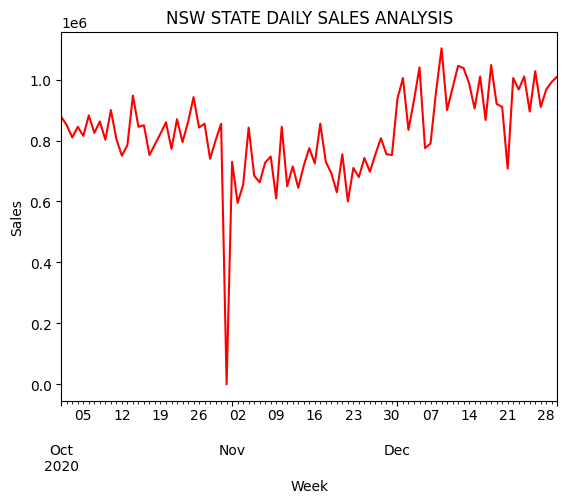

In [107]:
nsw_state.Sales.resample('D').sum().plot(title='NSW STATE DAILY SALES ANALYSIS',color='red')
plt.xlabel('Week')
plt.ylabel('Sales')

- The off-peak was on Oct last week & the peek was on Dec second week.

Text(0, 0.5, 'Sales')

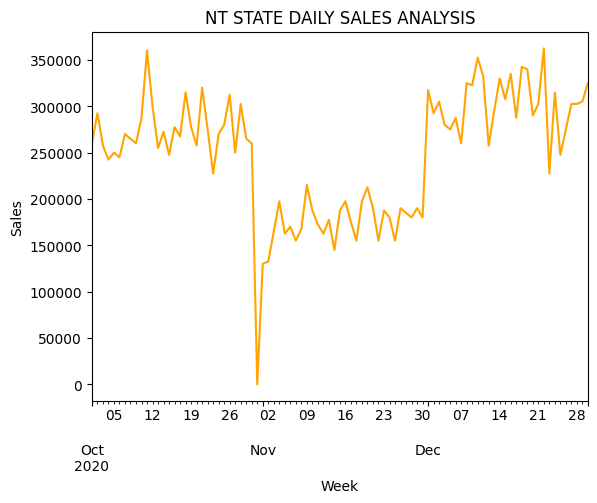

In [109]:
nt_state.Sales.resample('D').sum().plot(title='NT STATE DAILY SALES ANALYSIS',color='orange')
plt.xlabel('Week')
plt.ylabel('Sales')

- The off-peak was on Oct last week & the peek was on Dec last week.

Text(0, 0.5, 'Sales')

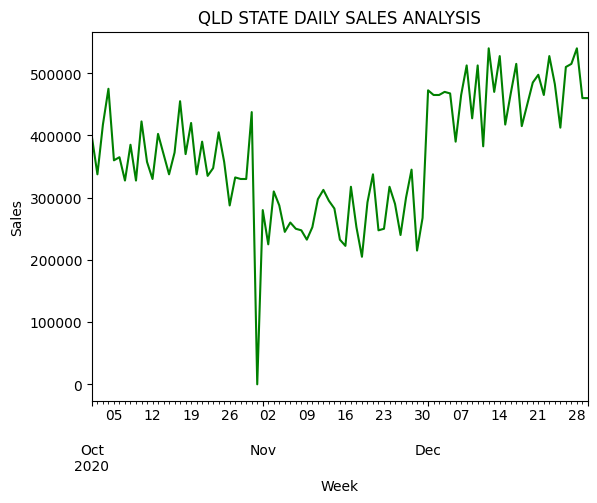

In [111]:
qld_state.Sales.resample('D').sum().plot(title='QLD STATE DAILY SALES ANALYSIS',color='green')
plt.xlabel('Week')
plt.ylabel('Sales')

- The off-peak was on Oct last week & the peek was on Dec last week.

Text(0, 0.5, 'Sales')

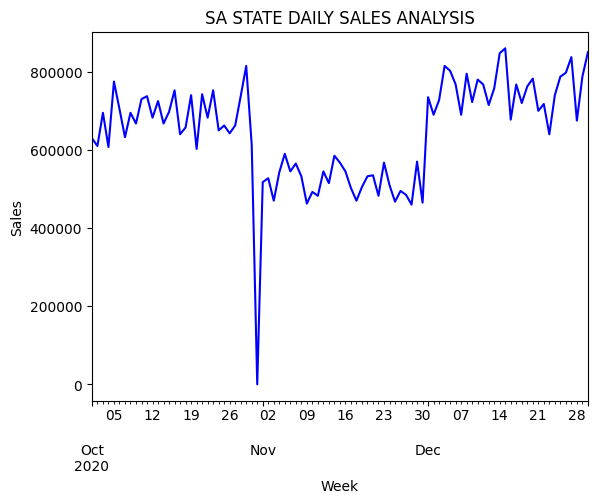

In [113]:
sa_state.Sales.resample('D').sum().plot(title='SA STATE DAILY SALES ANALYSIS',color='blue')
plt.xlabel('Week')
plt.ylabel('Sales')

- The off-peak was on Oct last week & the peek was on Dec third week.

Text(0, 0.5, 'Sales')

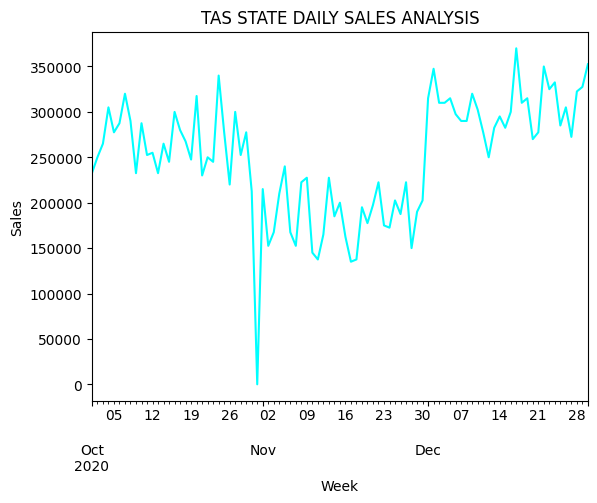

In [115]:
tas_state.Sales.resample('D').sum().plot(title='TAS STATE DAILY SALES ANALYSIS',color='cyan')
plt.xlabel('Week')
plt.ylabel('Sales')

- The off-peak was on Oct last week & the peek was on Dec third week.

Text(0, 0.5, 'Sales')

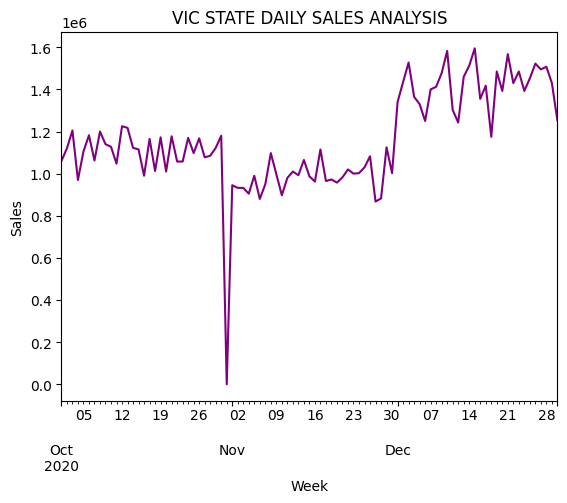

In [117]:
vic_state.Sales.resample('D').sum().plot(title='VIC STATE DAILY SALES ANALYSIS',color='purple')
plt.xlabel('Week')
plt.ylabel('Sales')

- The off-peak was on Oct last week & the peek was on Dec last week.

Text(0, 0.5, 'Sales')

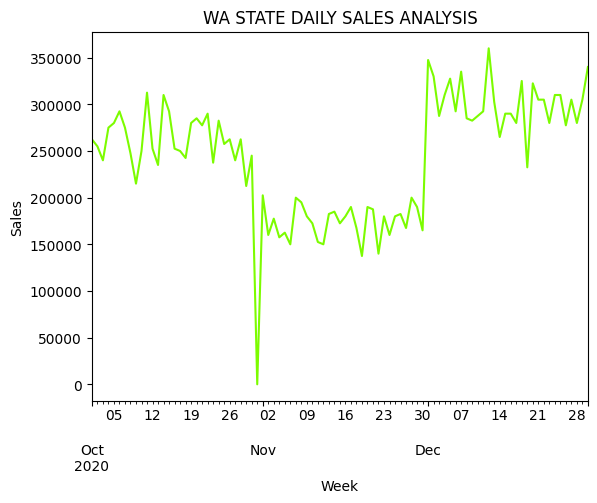

In [119]:
wa_state.Sales.resample('D').sum().plot(title='WA STATE DAILY SALES ANALYSIS',color='lawngreen')
plt.xlabel('Week')
plt.ylabel('Sales')

- The off-peak was on Oct last week & the peek was on Dec second week.

#### Data visualization for effective decision-making by the head of sales and marketing (S&M). Dashboard on daily, weekly, monthly, and quarterly charts. 

<Axes: xlabel='State', ylabel='Sales'>

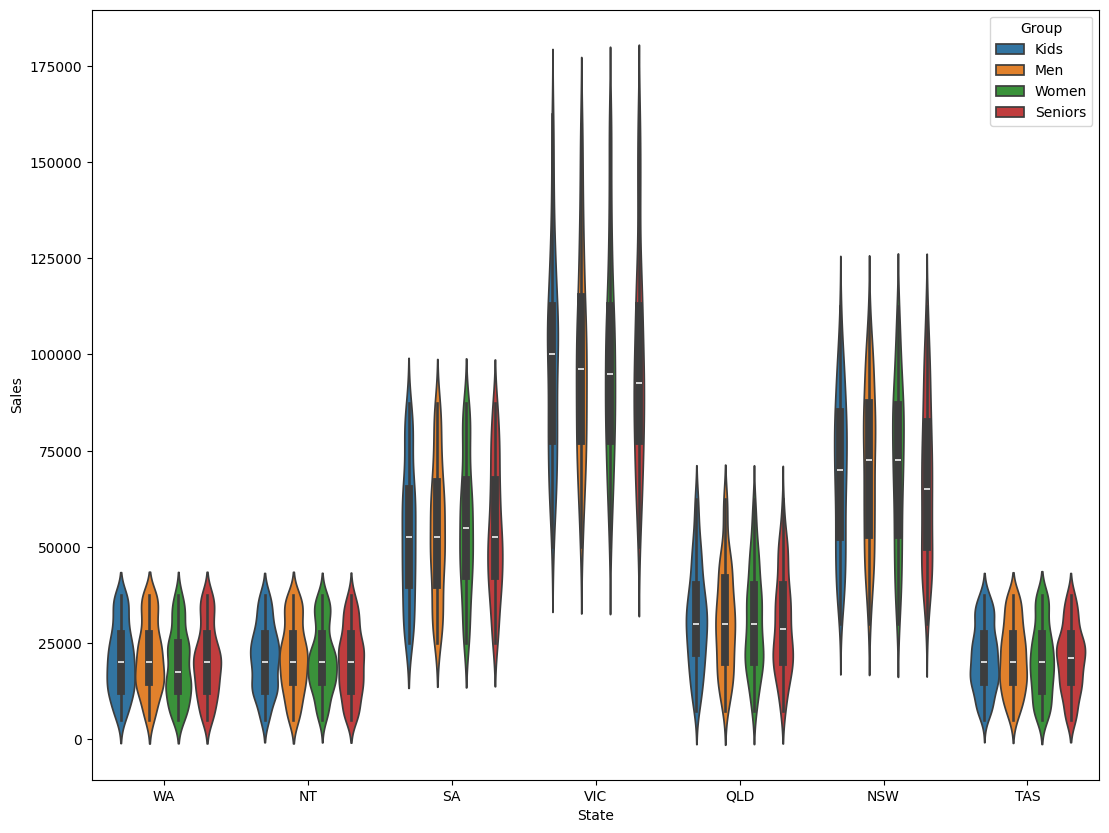

In [122]:
plt.figure(figsize=(13,10))
sns.violinplot(data=df,x='State',y='Sales',hue='Group')

 - From the above violin chart we can see max & min sales done by each state along with demographic groups. We can also see the median and density distribution of each group.

In [124]:
import pandas as pd
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output

# ---------- 1 . Load data ----------
dfd = pd.read_csv("AusApparalSales4thQrt2020.csv", parse_dates=["Date"])
dfd = dfd.sort_values("Date")                         
dfd.set_index("Date", inplace=True)


sales_col = "Sales"   

# ---------- 2 . Time-series aggregations ----------
agg = {
    "Daily"     : dfd[sales_col],                           
    "Weekly"    : dfd[sales_col].resample("W").sum(),
    "Monthly"   : dfd[sales_col].resample("ME").sum(),
    
}

# ---------- 3 . Dash app ----------
app = Dash(__name__, title="AusApparel Sales Dashboard")

app.layout = html.Div(
    style={"fontFamily": "Arial, sans-serif", "padding": "1rem 2rem"},
    children=[
        html.H1("AusApparel Sales – 2020 Q4 Dashboard"),
        dcc.DatePickerRange(
            id="date_range",
            min_date_allowed=dfd.index.min().date(),
            max_date_allowed=dfd.index.max().date(),
            start_date=dfd.index.min().date(),
            end_date=dfd.index.max().date(),
            style={"marginBottom": "1rem"},
        ),
        # 4 graphs stacked vertically
        html.Div(id="charts"),
        html.Hr(),
        html.P(
            "Hover to see exact values • Click legend to hide/show series • "
            "Use camera-icon in top-right of each chart to download PNG"
        ),
    ],
)

# ---------- 4 . Update callback ----------
@app.callback(
    Output("charts", "children"),
    Input("date_range", "start_date"),
    Input("date_range", "end_date"),
)
def update_charts(start_date, end_date):
    # filter range
    mask = (dfd.index >= start_date) & (dfd.index <= end_date)
    children = []
    for freq, series in agg.items():
        
        if freq == "Daily":
            plot_series = series.loc[mask]
        else:
            plot_series = series[ (series.index >= start_date) & (series.index <= end_date) ]
        fig = go.Figure(
            data=[go.Bar(x=plot_series.index, y=plot_series.values, name=freq)],
            layout=go.Layout(
                title=f"{freq} Sales",
                yaxis_title="AUD $",
                xaxis_title="Date",
                bargap=0.2 if freq=="Daily" else 0.1,
                template="plotly_white",
                height=300,
            ),
        )
        children.append(dcc.Graph(figure=fig))
    return children

# ---------- 5 . Run ----------
if __name__ == "__main__":
    app.run_server(debug=True, port=8057)

- The dashboard lets managers pick any date window inside Q4-2020 and instantly see bar-charts of AusApparel’s sales aggregated daily, weekly, and month-end.